In [1]:
# import the libraries

import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime
import re

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure 

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjust the configuration of the plots we will create


In [2]:
#Read the data

df = pd.read_csv('/Users/hitesh/Downloads/movies.csv')

In [3]:
# Lets look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# Checking for the missing data 

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [5]:
# drop the rows where the budget column has missing values

df.dropna(subset=['budget'], inplace=True)


In [6]:
#Checking if the missing values have gone from budget column

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 1%
company - 0%
runtime - 0%


In [7]:
# drop the rows where the gross column has missing values

df.dropna(subset=['gross'], inplace=True)


In [8]:
#Again checking for the missing values are gone from gross column

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [9]:
# Data types of our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [10]:
#Changing the data type of a budget, votes and gross column

df['budget'] = df['budget'].astype('int64')

df['votes'] = df['votes'].astype('int64')

df['gross'] = df['gross'].astype('int64')


In [11]:
#Changed the country column values to match the same with released column

df['country'] = df['released'].str.extract('\((.*?)\)')

print(df)

                                                name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7651                            The Call of the Wild         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   

      year                           released  score    votes  

In [12]:
# Removed country from released column to standardrise it 

df['released_date'] = df['released'].apply(lambda x: re.sub(r'\(.*?\)', '', x))

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United States,19000000,46998772,Warner Bros.,146.0,"June 13, 1980"
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980"
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980"
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,"January 17, 2020"
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,"February 14, 2020"
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,"January 17, 2020"
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000,Chris Sanders,Michael Green,Harrison Ford,United States,135000000,111105497,20th Century Studios,100.0,"February 21, 2020"


In [13]:
#Dropped released column

df.drop('released', axis=1, inplace=True)

In [14]:
#Order by the gross revenue

df.sort_values(by = ['gross'],inplace = False, ascending=False)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date
5445,Avatar,PG-13,Action,2009,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,"December 18, 2009"
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,"April 26, 2019"
3045,Titanic,PG-13,Drama,1997,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,"December 19, 1997"
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,"December 18, 2015"
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,"April 27, 2018"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,Philadelphia Experiment II,PG-13,Action,1993,4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,South Korea,5000000,2970,Trimark Pictures,97.0,"June 4, 1994"
3681,Ginger Snaps,Not Rated,Drama,2000,6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,"May 11, 2001"
272,Parasite,R,Horror,1982,3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,"March 12, 1982"
2417,Madadayo,NaN,Drama,1993,7.3,5100,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0,"April 17, 1993"


In [15]:
#Drop any duplicates 

df.drop_duplicates()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United States,19000000,46998772,Warner Bros.,146.0,"June 13, 1980"
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980"
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980"
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,"January 17, 2020"
7649,Sonic the Hedgehog,PG,Action,2020,6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,"February 14, 2020"
7650,Dolittle,PG,Adventure,2020,5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,"January 17, 2020"
7651,The Call of the Wild,PG,Adventure,2020,6.8,42000,Chris Sanders,Michael Green,Harrison Ford,United States,135000000,111105497,20th Century Studios,100.0,"February 21, 2020"


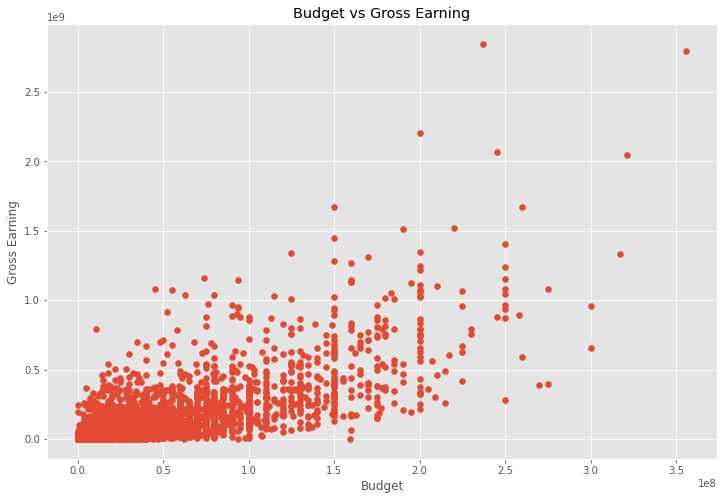

In [17]:
# Scatter Plot with budget vs gross revenue 

plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs Gross Earning')
plt.xlabel('Budget')
plt.ylabel('Gross Earning')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

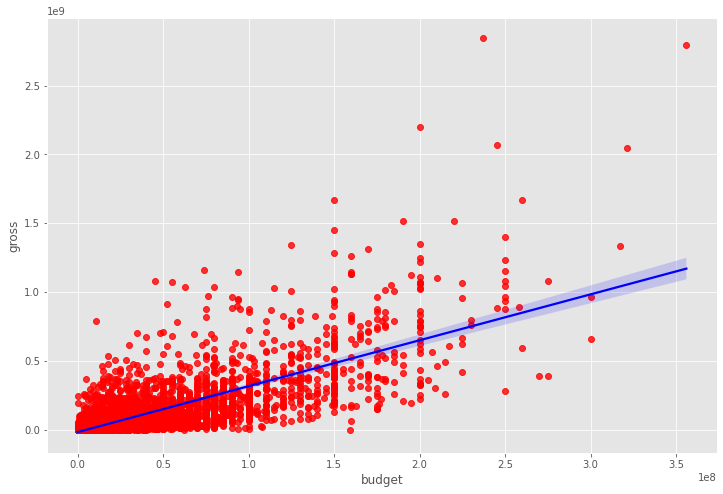

In [19]:
# Plot scatter plot with the linear regression line budget vs gross

sns.regplot(x = 'budget',y = 'gross', data = df, scatter_kws ={"color":"red"}, line_kws = {"color":"blue"})

# There is a high correlation between budget and gross. 

In [20]:
# Let's start looking at correlation # Only Numeric fields 
# Correlation method: Pearson

df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.055174,0.205758,0.327781,0.274264,0.074203
score,0.055174,1.000000,0.473809,0.071792,0.222143,0.414580
votes,0.205758,0.473809,1.000000,0.440021,0.614904,0.352437
budget,0.327781,0.071792,0.440021,1.000000,0.740395,0.318595
gross,0.274264,0.222143,0.614904,0.740395,1.000000,0.275596
runtime,0.074203,0.414580,0.352437,0.318595,0.275596,1.000000


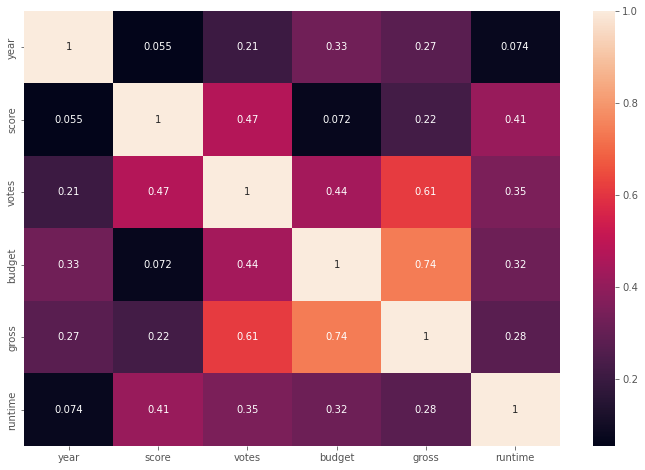

In [21]:
# Heatmap for the correlation matrix 

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for numeric features')
plt.xlabel('Movie Feature')
plt.ylabel('Movie Feature')

plt.show()

#There is a high correlation between votes, budget with gross. It means that more number of votes a particular movie receives the gross revenue will significantly increase. Therefore, on a business stand point, they should invest more on gathering feedback from viewers on a movie. Also, more money they invest in making the money, the higher chances of it earning more revenue. 

In [22]:
# Converting each categorical variable to a numeric variable to find the correlation with gross

df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date
0,4706,6,6,1980,8.4,927000,1800,2841,700,47,19000000,46998772,1432,146.0,1242
1,3943,6,1,1980,5.8,65000,1581,1160,215,47,4500000,58853106,454,104.0,1068
2,3654,4,0,1980,8.7,1200000,759,1822,1161,47,18000000,538375067,949,124.0,1291
3,205,4,4,1980,7.7,221000,891,1416,1478,47,3500000,83453539,1114,88.0,1068
4,734,6,4,1980,7.3,108000,721,352,272,47,6000000,39846344,1089,98.0,1111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,416,6,0,2020,6.6,140000,17,2397,1819,47,90000000,426505244,454,124.0,863
7649,3569,4,0,2020,6.5,102000,854,2316,148,47,85000000,319715683,1114,99.0,677
7650,1156,4,1,2020,5.6,53000,1814,2836,1474,47,175000000,245487753,1403,101.0,863
7651,3992,4,1,2020,6.8,42000,296,2096,641,47,135000000,111105497,12,100.0,721


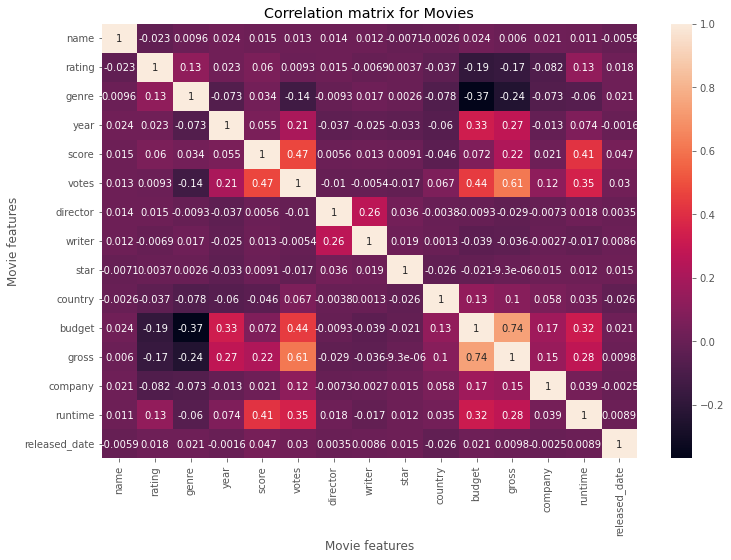

In [23]:
#Representing the correlation matrix with each variable 

correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()


In [24]:
# Correlation matrix in a list/stack format

correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name           name             1.000000
               rating          -0.023013
               genre            0.009617
               year             0.024435
               score            0.014955
                                  ...   
released_date  budget           0.021113
               gross            0.009791
               company         -0.002501
               runtime          0.008894
               released_date    1.000000
Length: 225, dtype: float64

<AxesSubplot:>

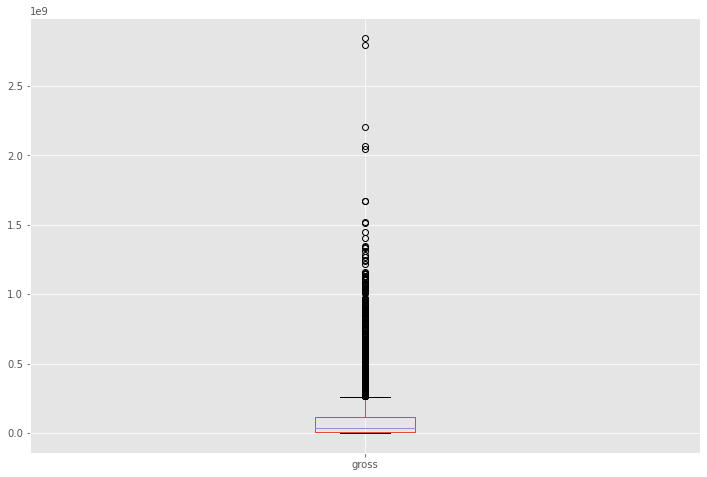

In [25]:
# Are there any Outliers?

df.boxplot(column=['gross'])


/Users/hitesh/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 27.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/hitesh/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/hitesh/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 68.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/hitesh/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 79.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/hitesh/opt/anaconda3/lib/python3.9/site-packag

<AxesSubplot:xlabel='rating', ylabel='gross'>

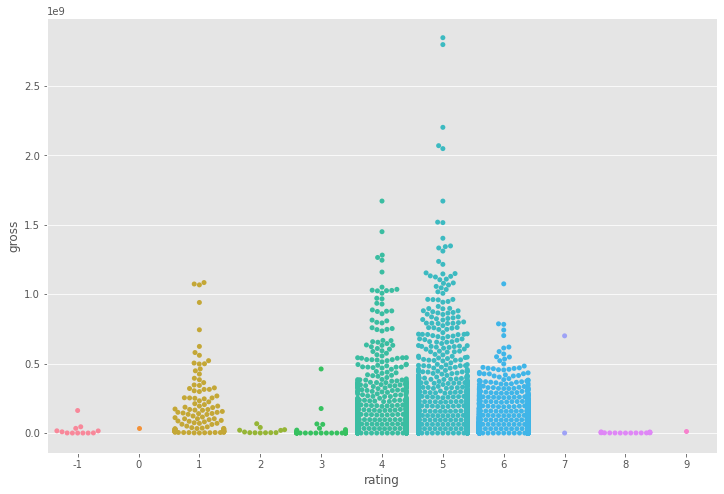

In [26]:
sns.swarmplot(x="rating", y="gross", data=df)
